# Wrangle and Analyze Data

## Gather

In [7]:
# import needed libraries and load data
import pandas as pd
import numpy as np
import requests
import os
import io
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


##### 1st

In [8]:
# first data source 
WRD_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

##### 2nd

In [9]:
# second data source 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [10]:
 with open(os.path.join(os.getcwd(),
                          url.split('/')[-1]), mode = 'wb') as file:
        file.write(response.content)

In [11]:
image_predictions = pd.read_csv("image-predictions.tsv", sep="\t" )

##### 3rd

In [12]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = WRD_twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet-json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

Fail
288: 838561493054533637
Fail
289: 838476387338051585
Fail
290: 838201503651401729
Fail
291: 838150277551247360
Fail
292: 838085839343206401
Fail
293: 838083903487373313
Fail
294: 837820167694528512
Fail
295: 837482249356513284
Fail
296: 837471256429613056
Fail
297: 837366284874571778
Fail
298: 837110210464448512
Fail
299: 837012587749474308
Fail
300: 836989968035819520
Fail
301: 836753516572119041
Fail
302: 836677758902222849
Fail
303: 836648853927522308
Fail
304: 836397794269200385
Fail
305: 836380477523124226
Fail
306: 836260088725786625
Fail
307: 836001077879255040
Fail
308: 835685285446955009
Fail
309: 835574547218894849
Fail
310: 835536468978302976
Fail
311: 835309094223372289
Fail
312: 835297930240217089
Fail
313: 835264098648616962
Fail
314: 835246439529840640
Fail
315: 835172783151792128
Fail
316: 835152434251116546
Fail
317: 834931633769889797
Fail
318: 834786237630337024
Fail
319: 834574053763584002
Fail
320: 834477809192075265
Fail
321: 834458053273591808
Fail
322: 8342

Fail
571: 801854953262350336
Fail
572: 801538201127157760
Fail
573: 801285448605831168
Fail
574: 801167903437357056
Fail
575: 801127390143516673
Fail
576: 801115127852503040
Fail
577: 800859414831898624
Fail
578: 800855607700029440
Fail
579: 800751577355128832
Fail
580: 800513324630806528
Fail
581: 800459316964663297
Fail
582: 800443802682937345
Fail
583: 800388270626521089
Fail
584: 800188575492947969
Fail
585: 800141422401830912
Fail
586: 800018252395122689
Fail
587: 799774291445383169
Fail
588: 799757965289017345
Fail
589: 799422933579902976
Fail
590: 799308762079035393
Fail
591: 799297110730567681
Fail
592: 799063482566066176
Fail
593: 798933969379225600
Fail
594: 798925684722855936
Fail
595: 798705661114773508
Fail
596: 798701998996647937
Fail
597: 798697898615730177
Fail
598: 798694562394996736
Fail
599: 798686750113755136
Fail
600: 798682547630837760
Fail
601: 798673117451325440
Fail
602: 798665375516884993
Fail
603: 798644042770751489
Fail
604: 798628517273620480
Fail
605: 7985

Fail
854: 765371061932261376
Fail
855: 765222098633691136
Fail
856: 764857477905154048
Fail
857: 764259802650378240
Fail
858: 763956972077010945
Fail
859: 763837565564780549
Fail
860: 763183847194451968
Fail
861: 763167063695355904
Fail
862: 763103485927849985
Fail
863: 762699858130116608
Fail
864: 762471784394268675
Fail
865: 762464539388485633
Fail
866: 762316489655476224
Fail
867: 762035686371364864
Fail
868: 761976711479193600
Fail
869: 761750502866649088
Fail
870: 761745352076779520
Fail
871: 761672994376806400
Fail
872: 761599872357261312
Fail
873: 761371037149827077
Fail
874: 761334018830917632
Fail
875: 761292947749015552
Fail
876: 761227390836215808
Fail
877: 761004547850530816
Fail
878: 760893934457552897
Fail
879: 760656994973933572
Fail
880: 760641137271070720
Fail
881: 760539183865880579
Fail
882: 760521673607086080
Fail
883: 760290219849637889
Fail
884: 760252756032651264
Fail
885: 760190180481531904
Fail
886: 760153949710192640
Fail
887: 759943073749200896
Fail
888: 7599

Fail
1132: 728986383096946689
Fail
1133: 728760639972315136
Fail
1134: 728751179681943552
Fail
1135: 728653952833728512
Fail
1136: 728409960103686147
Fail
1137: 728387165835677696
Fail
1138: 728046963732717569
Fail
1139: 728035342121635841
Fail
1140: 728015554473250816
Fail
1141: 727685679342333952
Fail
1142: 727644517743104000
Fail
1143: 727524757080539137
Fail
1144: 727314416056803329
Fail
1145: 727286334147182592
Fail
1146: 727175381690781696
Fail
1147: 727155742655025152
Fail
1148: 726935089318363137
Fail
1149: 726887082820554753
Fail
1150: 726828223124897792
Fail
1151: 726224900189511680
Fail
1152: 725842289046749185
Fail
1153: 725786712245440512
Fail
1154: 725729321944506368
Fail
1155: 725458796924002305
Fail
1156: 724983749226668032
Fail
1157: 724771698126512129
Fail
1158: 724405726123311104
Fail
1159: 724049859469295616
Fail
1160: 724046343203856385
Fail
1161: 724004602748780546
Fail
1162: 723912936180330496
Fail
1163: 723688335806480385
Fail
1164: 723673163800948736
Fail
1165:

Fail
1406: 699323444782047232
Fail
1407: 699088579889332224
Fail
1408: 699079609774645248
Fail
1409: 699072405256409088
Fail
1410: 699060279947165696
Fail
1411: 699036661657767936
Fail
1412: 698989035503689728
Fail
1413: 698953797952008193
Fail
1414: 698907974262222848
Fail
1415: 698710712454139905
Fail
1416: 698703483621523456
Fail
1417: 698635131305795584
Fail
1418: 698549713696649216
Fail
1419: 698355670425473025
Fail
1420: 698342080612007937
Fail
1421: 698262614669991936
Fail
1422: 698195409219559425
Fail
1423: 698178924120031232
Fail
1424: 697995514407682048
Fail
1425: 697990423684476929
Fail
1426: 697943111201378304
Fail
1427: 697881462549430272
Fail
1428: 697630435728322560
Fail
1429: 697616773278015490
Fail
1430: 697596423848730625
Fail
1431: 697575480820686848
Fail
1432: 697516214579523584
Fail
1433: 697482927769255936
Fail
1434: 697463031882764288
Fail
1435: 697270446429966336
Fail
1436: 697259378236399616
Fail
1437: 697255105972801536
Fail
1438: 697242256848379904
Fail
1439:

Fail
1680: 682032003584274432
Fail
1681: 682003177596559360
Fail
1682: 681981167097122816
Fail
1683: 681891461017812993
Fail
1684: 681694085539872773
Fail
1685: 681679526984871937
Fail
1686: 681654059175129088
Fail
1687: 681610798867845120
Fail
1688: 681579835668455424
Fail
1689: 681523177663676416
Fail
1690: 681340665377193984
Fail
1691: 681339448655802368
Fail
1692: 681320187870711809
Fail
1693: 681302363064414209
Fail
1694: 681297372102656000
Fail
1695: 681281657291280384
Fail
1696: 681261549936340994
Fail
1697: 681242418453299201
Fail
1698: 681231109724700672
Fail
1699: 681193455364796417
Fail
1700: 680970795137544192
Fail
1701: 680959110691590145
Fail
1702: 680940246314430465
Fail
1703: 680934982542561280
Fail
1704: 680913438424612864
Fail
1705: 680889648562991104
Fail
1706: 680836378243002368
Fail
1707: 680805554198020098
Fail
1708: 680801747103793152
Fail
1709: 680798457301471234
Fail
1710: 680609293079592961
Fail
1711: 680583894916304897
Fail
1712: 680497766108381184
Fail
1713:

Fail
1954: 673662677122719744
Fail
1955: 673656262056419329
Fail
1956: 673636718965334016
Fail
1957: 673612854080196609
Fail
1958: 673583129559498752
Fail
1959: 673580926094458881
Fail
1960: 673576835670777856
Fail
1961: 673363615379013632
Fail
1962: 673359818736984064
Fail
1963: 673355879178194945
Fail
1964: 673352124999274496
Fail
1965: 673350198937153538
Fail
1966: 673345638550134785
Fail
1967: 673343217010679808
Fail
1968: 673342308415348736
Fail
1969: 673320132811366400
Fail
1970: 673317986296586240
Fail
1971: 673295268553605120
Fail
1972: 673270968295534593
Fail
1973: 673240798075449344
Fail
1974: 673213039743795200
Fail
1975: 673148804208660480
Fail
1976: 672997845381865473
Fail
1977: 672995267319328768
Fail
1978: 672988786805112832
Fail
1979: 672984142909456390
Fail
1980: 672980819271634944
Fail
1981: 672975131468300288
Fail
1982: 672970152493887488
Fail
1983: 672968025906282496
Fail
1984: 672964561327235073
Fail
1985: 672902681409806336
Fail
1986: 672898206762672129
Fail
1987:

Fail
2228: 668268907921326080
Fail
2229: 668256321989451776
Fail
2230: 668248472370458624
Fail
2231: 668237644992782336
Fail
2232: 668226093875376128
Fail
2233: 668221241640230912
Fail
2234: 668204964695683073
Fail
2235: 668190681446379520
Fail
2236: 668171859951755264
Fail
2237: 668154635664932864
Fail
2238: 668142349051129856
Fail
2239: 668113020489474048
Fail
2240: 667937095915278337
Fail
2241: 667924896115245057
Fail
2242: 667915453470232577
Fail
2243: 667911425562669056
Fail
2244: 667902449697558528
Fail
2245: 667886921285246976
Fail
2246: 667885044254572545
Fail
2247: 667878741721415682
Fail
2248: 667873844930215936
Fail
2249: 667866724293877760
Fail
2250: 667861340749471744
Fail
2251: 667832474953625600
Fail
2252: 667806454573760512
Fail
2253: 667801013445750784
Fail
2254: 667793409583771648
Fail
2255: 667782464991965184
Fail
2256: 667773195014021121
Fail
2257: 667766675769573376
Fail
2258: 667728196545200128
Fail
2259: 667724302356258817
Fail
2260: 667550904950915073
Fail
2261:

The above code failed to get the text data using the tweet_ids taken from the tweet archive because Twitter did not give me access to twitter developer api. Therefore instade I am using the link downlaodable file tweet_json.txt as shown below.

In [13]:
# Create a list to loop to append the data from twitter txt file to create the dataframe    
twitter_data = []

twitter_txt = open('tweet_json.txt', "r")

for line in twitter_txt:
    try:
        raw = json.loads(line)
        twitter_data.append(raw)
    except:
        continue
        
twitter_txt.close()


# Create tweet_info DataFrame
WRD_tweet_info = pd.DataFrame()

# Add selected variables to tweet_info DataFrame
WRD_tweet_info['id'] = list(map(lambda tweet: tweet['id'], twitter_data))
WRD_tweet_info['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], twitter_data))
WRD_tweet_info['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], twitter_data))

## Assess

In [14]:
WRD_twitter_archive

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
6     890971913173991426                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
9     890240255349198849                    NaN                  NaN   
10    890006608113172480                    NaN                  NaN   
11    889880896479866881                    NaN                  NaN   
12    889665388333682689                    NaN                  NaN   
13    889638837579907072                    NaN                  NaN   
14    889531135344209921                    NaN                  NaN   
15    889278841981685760                    NaN                  NaN   
16    888917238123831296                    NaN                  NaN   
17    888804989199671297                    NaN                  NaN   
18    888554962724278272                    NaN                  NaN   
19    888202515573088257                    NaN                  NaN   
20    888078434458587136                    NaN                  NaN   
21    887705289381826560                    NaN                  NaN   
22    887517139158093824                    NaN                  NaN   
23    887473957103951883                    NaN                  NaN   
24    887343217045368832                    NaN                  NaN   
25    887101392804085760                    NaN                  NaN   
26    886983233522544640                    NaN                  NaN   
27    886736880519319552                    NaN                  NaN   
28    886680336477933568                    NaN                  NaN   
29    886366144734445568                    NaN                  NaN   
...                  ...                    ...                  ...   
2326  666411507551481857                    NaN                  NaN   
2327  666407126856765440                    NaN                  NaN   
2328  666396247373291520                    NaN                  NaN   
2329  666373753744588802                    NaN                  NaN   
2330  666362758909284353                    NaN                  NaN   
2331  666353288456101888                    NaN                  NaN   
2332  666345417576210432                    NaN                  NaN   
2333  666337882303524864                    NaN                  NaN   
2334  666293911632134144                    NaN                  NaN   
2335  666287406224695296                    NaN                  NaN   
2336  666273097616637952                    NaN                  NaN   
2337  666268910803644416                    NaN                  NaN   
2338  666104133288665088                    NaN                  NaN   
2339  666102155909144576                    NaN                  NaN   
2340  666099513787052032                    NaN                  NaN   
2341  666094000022159362                    NaN                  NaN   
2342  666082916733198337                    NaN                  NaN   
2343  666073100786774016                    NaN                  NaN   
2344  666071193221509120                    NaN                  NaN   
2345  666063827256086533                    NaN                  NaN   
2346  666058600524156928                    NaN                  NaN   
2347  666057090499244032                    NaN                  NaN   
2348  666055525042405380                    NaN                  NaN   
2349  666051853826850816                    NaN         

In [15]:
image_predictions

tweet_id                                            jpg_url  \
0     666020888022790149    https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928    https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449    https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704    https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465    https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5     666050758794694657    https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6     666051853826850816    https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7     666055525042405380    https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8     666057090499244032    https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9     666058600524156928    https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   
10    666063827256086533    https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg   
11    666071193221509120    https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg   
12    666073100786774016    https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg   
13    666082916733198337    https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg   
14    666094000022159362    https://pbs.twimg.com/media/CT5w9gUW4AAsBNN.jpg   
15    666099513787052032    https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg   
16    666102155909144576    https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg   
17    666104133288665088    https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg   
18    666268910803644416    https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg   
19    666273097616637952    https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg   
20    666287406224695296    https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg   
21    666293911632134144    https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg   
22    666337882303524864    https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg   
23    666345417576210432    https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg   
24    666353288456101888    https://pbs.twimg.com/media/CT9cx0tUEAAhNN_.jpg   
25    666362758909284353    https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg   
26    666373753744588802    https://pbs.twimg.com/media/CT9vZEYWUAAlZ05.jpg   
27    666396247373291520    https://pbs.twimg.com/media/CT-D2ZHWIAA3gK1.jpg   
28    666407126856765440    https://pbs.twimg.com/media/CT-NvwmW4AAugGZ.jpg   
29    666411507551481857    https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg   
...                  ...                                                ...   
2045  886366144734445568    https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg   
2046  886680336477933568    https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg   
2047  886736880519319552    https://pbs.twimg.com/media/DE5Se8FXcAAJFx4.jpg   
2048  886983233522544640    https://pbs.twimg.com/media/DE8yicJW0AAAvBJ.jpg   
2049  887101392804085760    https://pbs.twimg.com/media/DE-eAq6UwAA-jaE.jpg   
2050  887343217045368832  https://pbs.twimg.com/ext_tw_video_thumb/88734...   
2051  887473957103951883    https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg   
2052  887517139158093824  https://pbs.twimg.com/ext_tw_video_thumb/88751...   
2053  887705289381826560    https://pbs.twimg.com/media/DFHDQBbXgAEqY7t.jpg   
2054  888078434458587136    https://pbs.twimg.com/media/DFMWn56WsAAkA7B.jpg   
2055  888202515573088257    https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg   
2056  888554962724278272    https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg   
2057  888804989199671297    https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg   
2058  888917238123831296    https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg   
2059  889278841981685760  https://pbs.twimg.com/ext_tw_video_thumb/88927...   
2060  889531135344209921    https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg   
2061  889638837579907072    https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg   
2062  889665388333682689    https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg   
2063  889880896479866881    https://pbs.twimg.com/media/DFl99B1WsA

In [16]:
WRD_tweet_info

id  retweet_count  favorite_count
0     892420643555336193           8853           39467
1     892177421306343426           6514           33819
2     891815181378084864           4328           25461
3     891689557279858688           8964           42908
4     891327558926688256           9774           41048
5     891087950875897856           3261           20562
6     890971913173991426           2158           12041
7     890729181411237888          16716           56848
8     890609185150312448           4429           28226
9     890240255349198849           7711           32467
10    890006608113172480           7624           31166
11    889880896479866881           5156           28268
12    889665388333682689           8538           38818
13    889638837579907072           4735           27672
14    889531135344209921           2321           15359
15    889278841981685760           5637           25652
16    888917238123831296           4709           29611
17    888804989199671297           4559           26080
18    888554962724278272           3732           20290
19    888078434458587136           3653           22201
20    887705289381826560           5609           30779
21    887517139158093824          12082           46959
22    887473957103951883          18781           69871
23    887343217045368832          10737           34222
24    887101392804085760           6167           31061
25    886983233522544640           8084           35859
26    886736880519319552           3443           12306
27    886680336477933568           4610           22798
28    886366144734445568           3316           21524
29    886267009285017600              4             117
...                  ...            ...             ...
2324  666411507551481857            339             459
2325  666407126856765440             44             113
2326  666396247373291520             92             172
2327  666373753744588802            100             194
2328  666362758909284353            595             804
2329  666353288456101888             77             229
2330  666345417576210432            146             307
2331  666337882303524864             96             204
2332  666293911632134144            368             522
2333  666287406224695296             71             152
2334  666273097616637952             82             184
2335  666268910803644416             37             108
2336  666104133288665088           6871           14765
2337  666102155909144576             16              81
2338  666099513787052032             73             164
2339  666094000022159362             79             169
2340  666082916733198337             47             121
2341  666073100786774016            174             335
2342  666071193221509120             67             154
2343  666063827256086533            232             496
2344  666058600524156928             61             115
2345  666057090499244032            146             304
2346  666055525042405380            261             448
2347  666051853826850816            879            1253
2348  666050758794694657             60             136
2349  666049248165822465             41             111
2350  666044226329800704            147             311
2351  666033412701032449             47             128
2352  666029285002620928             48             132
2353  666020888022790149            532            2535

[2354 rows x 3 columns]

In [17]:
WRD_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [18]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
WRD_tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [20]:
WRD_twitter_archive.isnull().any()

tweet_id                      False
in_reply_to_status_id          True
in_reply_to_user_id            True
timestamp                     False
source                        False
text                          False
retweeted_status_id            True
retweeted_status_user_id       True
retweeted_status_timestamp     True
expanded_urls                  True
rating_numerator              False
rating_denominator            False
name                          False
doggo                         False
floofer                       False
pupper                        False
puppo                         False
dtype: bool

In [21]:
WRD_twitter_archive['rating_numerator'].unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88], dtype=int64)

In [22]:
WRD_twitter_archive['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', '

#### Quality:

##### WRD_twitter_archive table:

- Retweet rows will give a missleading ratings.
- The columns retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp has Nan values in its content. 
- in_reply_to_status_id	and in_reply_to_user_id variables has Nan values as content.  
- Some of the rating_denominator has wrong value EX. tweet_id# 666287406224695296.
- Tweet's texts is not completely displayed.
- Some float rating_numerator have wrong datatype and just the value after the point is extracted. 
- Remove null expanded_urls.
- Incorrect dog names
- Change datatypes

#### WRD_tweet_info table:

- The id column name does not match the other two tables.

#### Tidiness:

- Dog "stage" variable in four columns: doggo, floofer, pupper, puppo.
- add the retweet_count	and favorite_count from WRD_tweet_info and jpg_url from image_predictions to the WRD_twitter_archive using tweet_id.

## Clean

### First Quality Issues:

In [23]:
# craete a copy of each table to keep the orginal tables for reference 
WRD_twitter_archive_clean = WRD_twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
WRD_tweet_info_clean = WRD_tweet_info.copy()

###### Retweet raws will give a missleading ratings.

#### Define

Find the retweeted tweets and remove these raws

#### Code

In [24]:
# Select rows where 'retweeted_status_id' is null to save to twitter_archive_clean
WRD_twitter_archive_clean = WRD_twitter_archive_clean[WRD_twitter_archive_clean['retweeted_status_id'].isnull()]

#### Test

In [25]:
WRD_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

###### The columns retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp has Nan values in its content.
###### in_reply_to_status_id and in_reply_to_user_id variables has Nan values as content.

#### Define

- Remove the columns retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp.
- And remove in_reply_to_status_id and in_reply_to_user_id variables from the second point

#### Code

In [26]:
# Use Dataframe.drop to remove the unwanted columns
WRD_twitter_archive_clean = WRD_twitter_archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id'], axis=1)

#### Test

In [27]:
# display the first five raws in the dataframe
WRD_twitter_archive_clean.head()

tweet_id                  timestamp  \
0  892420643555336193  2017-08-01 16:23:56 +0000   
1  892177421306343426  2017-08-01 00:17:27 +0000   
2  891815181378084864  2017-07-31 00:18:03 +0000   
3  891689557279858688  2017-07-30 15:58:51 +0000   
4  891327558926688256  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

##### some of the rating_denominator has wrong value EX. tweet_id# 666287406224695296.

#### Define

Assign the value = 10 to all the observations under the rating_denominator column. 

#### Code

In [28]:
# Recall the wrong value example raw
WRD_twitter_archive_clean.loc[WRD_twitter_archive_clean['tweet_id'] == 666287406224695296]

tweet_id                  timestamp  \
2335  666287406224695296  2015-11-16 16:11:11 +0000   

                                                 source  \
2335  <a href="http://twitter.com/download/iphone" r...   

                                                   text  \
2335  This is an Albanian 3 1/2 legged  Episcopalian...   

                                          expanded_urls  rating_numerator  \
2335  https://twitter.com/dog_rates/status/666287406...                 1   

      rating_denominator name doggo floofer pupper puppo  
2335                   2   an  None    None   None  None

In [29]:
# solution 
WRD_twitter_archive_clean['rating_denominator'] = 10

#### Test

In [30]:
# Chceck how many unique values are there in the rating_denominator column
WRD_twitter_archive_clean['rating_denominator'].unique()

array([10], dtype=int64)

##### tweet's text cutted

#### Define

tweet's texts is not completely displayed.

#### Code

In [31]:
# Set column width to infinite so entire content of columns is displayed
pd.set_option('display.max_colwidth', -1)

#### Test

In [32]:
WRD_twitter_archive_clean

tweet_id                  timestamp  \
0     892420643555336193  2017-08-01 16:23:56 +0000   
1     892177421306343426  2017-08-01 00:17:27 +0000   
2     891815181378084864  2017-07-31 00:18:03 +0000   
3     891689557279858688  2017-07-30 15:58:51 +0000   
4     891327558926688256  2017-07-29 16:00:24 +0000   
5     891087950875897856  2017-07-29 00:08:17 +0000   
6     890971913173991426  2017-07-28 16:27:12 +0000   
7     890729181411237888  2017-07-28 00:22:40 +0000   
8     890609185150312448  2017-07-27 16:25:51 +0000   
9     890240255349198849  2017-07-26 15:59:51 +0000   
10    890006608113172480  2017-07-26 00:31:25 +0000   
11    889880896479866881  2017-07-25 16:11:53 +0000   
12    889665388333682689  2017-07-25 01:55:32 +0000   
13    889638837579907072  2017-07-25 00:10:02 +0000   
14    889531135344209921  2017-07-24 17:02:04 +0000   
15    889278841981685760  2017-07-24 00:19:32 +0000   
16    888917238123831296  2017-07-23 00:22:39 +0000   
17    888804989199671297  2017-07-22 16:56:37 +0000   
18    888554962724278272  2017-07-22 00:23:06 +0000   
20    888078434458587136  2017-07-20 16:49:33 +0000   
21    887705289381826560  2017-07-19 16:06:48 +0000   
22    887517139158093824  2017-07-19 03:39:09 +0000   
23    887473957103951883  2017-07-19 00:47:34 +0000   
24    887343217045368832  2017-07-18 16:08:03 +0000   
25    887101392804085760  2017-07-18 00:07:08 +0000   
26    886983233522544640  2017-07-17 16:17:36 +0000   
27    886736880519319552  2017-07-16 23:58:41 +0000   
28    886680336477933568  2017-07-16 20:14:00 +0000   
29    886366144734445568  2017-07-15 23:25:31 +0000   
30    886267009285017600  2017-07-15 16:51:35 +0000   
...                  ...                        ...   
2326  666411507551481857  2015-11-17 00:24:19 +0000   
2327  666407126856765440  2015-11-17 00:06:54 +0000   
2328  666396247373291520  2015-11-16 23:23:41 +0000   
2329  666373753744588802  2015-11-16 21:54:18 +0000   
2330  666362758909284353  2015-11-16 21:10:36 +0000   
2331  666353288456101888  2015-11-16 20:32:58 +0000   
2332  666345417576210432  2015-11-16 20:01:42 +0000   
2333  666337882303524864  2015-11-16 19:31:45 +0000   
2334  666293911632134144  2015-11-16 16:37:02 +0000   
2335  666287406224695296  2015-11-16 16:11:11 +0000   
2336  666273097616637952  2015-11-16 15:14:19 +0000   
2337  666268910803644416  2015-11-16 14:57:41 +0000   
2338  666104133288665088  2015-11-16 04:02:55 +0000   
2339  666102155909144576  2015-11-16 03:55:04 +0000   
2340  666099513787052032  2015-11-16 03:44:34 +0000   
2341  666094000022159362  2015-11-16 03:22:39 +0000   
2342  666082916733198337  2015-11-16 02:38:37 +0000   
2343  666073100786774016  2015-11-16 01:59:36 +0000   
2344  666071193221509120  2015-11-16 01:52:02 +0000   
2345  666063827256086533  2015-11-16 01:22:45 +0000   
2346  666058600524156928  2015-11-16 01:01:59 +0000   
2347  666057090499244032  2015-11-16 00:55:59 +0000   
2348  666055525042405380  2015-11-16 00:49:46 +0000   
2349  666051853826850816  2015-11-16 00:35:11 +0000   
2350  666050758794694657  2015-11-16 00:30:50 +0000   
2351  666049248165822465  2015-11-16 00:24:50 +0000   
2352  666044226329800704  2015-11-16 00:04:52 +0000   
2353  666033412701032449  2015-11-15 23:21:54 +0000   
2354  666029285002620928  2015-11-15 23:05:30 +0000   
2355  666020888022790149  2015-11-15 22:32:08 +0000   

                                                                                  source  \
0     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
3     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
4     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
5     <a href="http://twitter.com/download/iphone" re

##### some float rating_numerator have wrong datatype and just the value after the point is extracted.

#### Define

Change the data types of the ratings values to floats then select the raws where we have wrong extraction of rating and fix it accordingly

#### Code

In [33]:
# View tweets with decimals in rating in 'text' column
WRD_twitter_archive_clean[WRD_twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

C:\Users\kh-mo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


tweet_id                  timestamp  \
45    883482846933004288  2017-07-08 00:28:19 +0000   
695   786709082849828864  2016-10-13 23:23:56 +0000   
763   778027034220126208  2016-09-20 00:24:34 +0000   
1689  681340665377193984  2015-12-28 05:07:27 +0000   
1712  680494726643068929  2015-12-25 21:06:00 +0000   

                                                                                  source  \
45    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
695   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
763   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1689  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1712  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                                   text  \
45    This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948                            
695   This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS                                    
763   This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq   
1689  I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace                                                          
1712  Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD                                                          

                                                                                                                        expanded_urls  \
45    https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1   
695   https://twitter.com/dog_rates/status/786709082849828864/photo/1                                                                   
763   https://twitter.com/dog_rates/status/778027034220126208/photo/1                                                                   
1689  NaN                                                                                                                               
1712  https://twitter.com/dog_rates/status/680494726643068929/photo/1                                                                   

      rating_numerator  rating_denominator    name doggo floofer  pupper puppo  
45    5                 10                  Bella   None  None    None    None  
695   75                10                  Logan   None  None    None    None  
763   27                10                  Sophie  None  None    pupper  None  
1689  5                 10                  None    None  None    None    None  
1712  26                10                  None    None  None    None    None

In [34]:
# Change datatype of rating_numerator and denominator to float
WRD_twitter_archive_clean['rating_numerator'] = WRD_twitter_archive_clean['rating_numerator'].astype('float')
WRD_twitter_archive_clean['rating_denominator'] = WRD_twitter_archive_clean['rating_denominator'].astype('float')

In [35]:
# Change the rating_numerator according to the correct value mentioned in the tweet's text
WRD_twitter_archive_clean.loc[(WRD_twitter_archive_clean['tweet_id'] == 883482846933004288) & (WRD_twitter_archive_clean['rating_numerator'] == 5), ['rating_numerator']] = 13.5
WRD_twitter_archive_clean.loc[(WRD_twitter_archive_clean['tweet_id'] == 786709082849828864) & (WRD_twitter_archive_clean['rating_numerator'] == 75), ['rating_numerator']] = 9.75
WRD_twitter_archive_clean.loc[(WRD_twitter_archive_clean['tweet_id'] == 778027034220126208) & (WRD_twitter_archive_clean['rating_numerator'] == 27), ['rating_numerator']] = 11.27
WRD_twitter_archive_clean.loc[(WRD_twitter_archive_clean['tweet_id'] == 680494726643068929) & (WRD_twitter_archive_clean['rating_numerator'] == 26), ['rating_numerator']] = 11.26

#### Test

In [36]:
# Review tweets with decimals in rating in 'text' column
WRD_twitter_archive_clean[WRD_twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

C:\Users\kh-mo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


tweet_id                  timestamp  \
45    883482846933004288  2017-07-08 00:28:19 +0000   
695   786709082849828864  2016-10-13 23:23:56 +0000   
763   778027034220126208  2016-09-20 00:24:34 +0000   
1689  681340665377193984  2015-12-28 05:07:27 +0000   
1712  680494726643068929  2015-12-25 21:06:00 +0000   

                                                                                  source  \
45    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
695   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
763   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1689  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1712  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                                   text  \
45    This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948                            
695   This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS                                    
763   This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq   
1689  I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace                                                          
1712  Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD                                                          

                                                                                                                        expanded_urls  \
45    https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1   
695   https://twitter.com/dog_rates/status/786709082849828864/photo/1                                                                   
763   https://twitter.com/dog_rates/status/778027034220126208/photo/1                                                                   
1689  NaN                                                                                                                               
1712  https://twitter.com/dog_rates/status/680494726643068929/photo/1                                                                   

      rating_numerator  rating_denominator    name doggo floofer  pupper puppo  
45    13.50             10.0                Bella   None  None    None    None  
695   9.75              10.0                Logan   None  None    None    None  
763   11.27             10.0                Sophie  None  None    pupper  None  
1689  5.00              10.0                None    None  None    None    None  
1712  11.26             10.0                None    None  None    None    None

##### Remove null expanded_urls

#### Define 

Select rows with null expanded_urls value and remove it.

#### Code 

In [37]:
# Select rows where 'expanded_urls' is null and save to twitter_archive_clean
WRD_twitter_archive_clean = WRD_twitter_archive_clean[WRD_twitter_archive_clean['expanded_urls'].notnull()]

#### Test

In [38]:
# 58 rows was removed
WRD_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2117 non-null int64
timestamp             2117 non-null object
source                2117 non-null object
text                  2117 non-null object
expanded_urls         2117 non-null object
rating_numerator      2117 non-null float64
rating_denominator    2117 non-null float64
name                  2117 non-null object
doggo                 2117 non-null object
floofer               2117 non-null object
pupper                2117 non-null object
puppo                 2117 non-null object
dtypes: float64(2), int64(1), object(9)
memory usage: 215.0+ KB


##### Incorrect dog names

#### Define

Check if name available in the tweet and use it names column if not replace with "None"

#### Code

In [39]:
names_list = ['a', 'all', 'this', 'my', 'Al', 'very', 'O', 'incredibly', 'one', 'not', 'quite']

In [40]:
WRD_twitter_archive_clean.loc[WRD_twitter_archive_clean['name'].isin(names_list)]  

tweet_id                  timestamp  \
56    881536004380872706  2017-07-02 15:32:16 +0000   
169   859196978902773760  2017-05-02 00:04:57 +0000   
193   855459453768019968  2017-04-21 16:33:22 +0000   
335   832645525019123713  2017-02-17 17:38:57 +0000   
369   828650029636317184  2017-02-06 17:02:17 +0000   
542   806219024703037440  2016-12-06 19:29:28 +0000   
649   792913359805018113  2016-10-31 02:17:31 +0000   
775   776201521193218049  2016-09-14 23:30:38 +0000   
801   772581559778025472  2016-09-04 23:46:12 +0000   
819   770655142660169732  2016-08-30 16:11:18 +0000   
820   770414278348247044  2016-08-30 00:14:12 +0000   
852   765395769549590528  2016-08-16 03:52:26 +0000   
924   755206590534418437  2016-07-19 01:04:16 +0000   
988   748977405889503236  2016-07-01 20:31:43 +0000   
993   748575535303884801  2016-06-30 17:54:50 +0000   
1002  747885874273214464  2016-06-28 20:14:22 +0000   
1004  747816857231626240  2016-06-28 15:40:07 +0000   
1017  746872823977771008  2016-06-26 01:08:52 +0000   
1031  745422732645535745  2016-06-22 01:06:43 +0000   
1049  743222593470234624  2016-06-15 23:24:09 +0000   
1097  736225175608430592  2016-05-27 15:58:54 +0000   
1120  731156023742988288  2016-05-13 16:15:54 +0000   
1138  728035342121635841  2016-05-05 01:35:26 +0000   
1193  717537687239008257  2016-04-06 02:21:30 +0000   
1207  715733265223708672  2016-04-01 02:51:22 +0000   
1340  704859558691414016  2016-03-02 02:43:09 +0000   
1351  704054845121142784  2016-02-28 21:25:30 +0000   
1361  703079050210877440  2016-02-26 04:48:02 +0000   
1368  702539513671897089  2016-02-24 17:04:07 +0000   
1382  700864154249383937  2016-02-20 02:06:50 +0000   
...                  ...                        ...   
2066  671147085991960577  2015-11-30 02:01:49 +0000   
2116  670427002554466305  2015-11-28 02:20:27 +0000   
2125  670361874861563904  2015-11-27 22:01:40 +0000   
2128  670303360680108032  2015-11-27 18:09:09 +0000   
2146  669923323644657664  2015-11-26 16:59:01 +0000   
2153  669661792646373376  2015-11-25 23:39:47 +0000   
2161  669564461267722241  2015-11-25 17:13:02 +0000   
2191  668955713004314625  2015-11-24 00:54:05 +0000   
2198  668815180734689280  2015-11-23 15:35:39 +0000   
2211  668614819948453888  2015-11-23 02:19:29 +0000   
2218  668507509523615744  2015-11-22 19:13:05 +0000   
2222  668466899341221888  2015-11-22 16:31:42 +0000   
2235  668171859951755264  2015-11-21 20:59:20 +0000   
2249  667861340749471744  2015-11-21 00:25:26 +0000   
2255  667773195014021121  2015-11-20 18:35:10 +0000   
2264  667538891197542400  2015-11-20 03:04:08 +0000   
2273  667470559035432960  2015-11-19 22:32:36 +0000   
2287  667177989038297088  2015-11-19 03:10:02 +0000   
2304  666983947667116034  2015-11-18 14:18:59 +0000   
2311  666781792255496192  2015-11-18 00:55:42 +0000   
2314  666701168228331520  2015-11-17 19:35:19 +0000   
2326  666411507551481857  2015-11-17 00:24:19 +0000   
2327  666407126856765440  2015-11-17 00:06:54 +0000   
2334  666293911632134144  2015-11-16 16:37:02 +0000   
2347  666057090499244032  2015-11-16 00:55:59 +0000   
2348  666055525042405380  2015-11-16 00:49:46 +0000   
2350  666050758794694657  2015-11-16 00:30:50 +0000   
2352  666044226329800704  2015-11-16 00:04:52 +0000   
2353  666033412701032449  2015-11-15 23:21:54 +0000   
2354  666029285002620928  2015-11-15 23:05:30 +0000   

                                                                                  source  \
56    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
169   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
193   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
335   <a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                   
369   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
542   <a href="http://twitter.com/download/iphone" re

In [41]:
# Replace the occurence of "O" with "O'Malley"
WRD_twitter_archive_clean.name = WRD_twitter_archive_clean.name.replace("O", "O'Malley")

C:\Users\kh-mo\Anaconda3\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [42]:
# Replace the occurence of "Al" with "Al Cabone"
WRD_twitter_archive_clean.name = WRD_twitter_archive_clean.name.replace("Al", "Al Cabone")

C:\Users\kh-mo\Anaconda3\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [43]:
# Change the name for id# 765395769549590528 from my to Zoey
WRD_twitter_archive_clean.name = WRD_twitter_archive_clean.name.replace("my", "Zoey")

C:\Users\kh-mo\Anaconda3\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [44]:
# Replace the occurence of "a" with Nan
WRD_twitter_archive_clean.name = WRD_twitter_archive_clean.name.replace('a', 'None')

C:\Users\kh-mo\Anaconda3\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [45]:
WRD_twitter_archive_clean.loc[WRD_twitter_archive_clean['name'].isin(names_list)]  

tweet_id                  timestamp  \
169   859196978902773760  2017-05-02 00:04:57 +0000   
193   855459453768019968  2017-04-21 16:33:22 +0000   
335   832645525019123713  2017-02-17 17:38:57 +0000   
369   828650029636317184  2017-02-06 17:02:17 +0000   
542   806219024703037440  2016-12-06 19:29:28 +0000   
819   770655142660169732  2016-08-30 16:11:18 +0000   
924   755206590534418437  2016-07-19 01:04:16 +0000   
988   748977405889503236  2016-07-01 20:31:43 +0000   
993   748575535303884801  2016-06-30 17:54:50 +0000   
1031  745422732645535745  2016-06-22 01:06:43 +0000   
1097  736225175608430592  2016-05-27 15:58:54 +0000   
1120  731156023742988288  2016-05-13 16:15:54 +0000   
1138  728035342121635841  2016-05-05 01:35:26 +0000   
1385  700747788515020802  2016-02-19 18:24:26 +0000   
1936  673956914389192708  2015-12-07 20:07:04 +0000   
2326  666411507551481857  2015-11-17 00:24:19 +0000   

                                                                                  source  \
169   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
193   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
335   <a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                   
369   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
542   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
819   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
924   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
988   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
993   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1031  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1097  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1120  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1138  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1385  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1936  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2326  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                                    text  \
169   We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9                 
193   Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x   
335   There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10  \nhttps://t.co/dp5h9bCwU7                                                             
369   Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK                                                             
542   We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi                  
819   We only rate dogs. Pls stop sending in non-canines like this Arctic Floof Kangaroo. This is very frustrating. 11/10 https://t.co/qlUDuPoE3d                          
924   This is one of the most inspirational stories I've ever come across. I have no words. 14/10 for both doggo and owner https://t.co/I5ld3eKD5k                         
988   What jokester sent in a pic without a dog in it? This is not @rock_rates. This is @dog_rates. Thank you ...10/10 https://t.co/nDPaYHr

In [46]:
# Since the rest of tweets above does not include name I will replace ['quite', 'one', 'very', 'all', 'this', 'not', 'incredibly'] 
names_list_2 = ['quite', 'one', 'very', 'all', 'this', 'not', 'incredibly'] 

WRD_twitter_archive_clean.name = WRD_twitter_archive_clean.name.replace(names_list_2, 'None')

C:\Users\kh-mo\Anaconda3\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


#### Test

In [47]:
WRD_twitter_archive_clean.loc[WRD_twitter_archive_clean['name'].isin(names_list_2)] 

Empty DataFrame
Columns: [tweet_id, timestamp, source, text, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

##### The id column name does not match the other two tables.

#### Define

Change the id column name to tweet_id

#### Code

In [48]:
WRD_tweet_info_clean.rename(columns={'id':'tweet_id'}, inplace=True)

#### Test

In [49]:
WRD_tweet_info_clean.head()

tweet_id  retweet_count  favorite_count
0  892420643555336193  8853           39467         
1  892177421306343426  6514           33819         
2  891815181378084864  4328           25461         
3  891689557279858688  8964           42908         
4  891327558926688256  9774           41048

### Second Tidiness Issues:

##### Dog "stage" variable in four columns: doggo, floofer, pupper, puppo.

#### Define

combine the dog 'stage': doggo, floofer, pupper, puppo into one column. 

#### Code

In [50]:
# Create 'dog_stage' variable which is made by extracting the dog stage variables from the text column when available 
WRD_twitter_archive_clean['dog_stage'] = WRD_twitter_archive_clean['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)

C:\Users\kh-mo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [51]:
# Create variable of columns that are no longer needed and drop them from the DataFrame 
columns = ['doggo', 'floofer', 'pupper', 'puppo']
WRD_twitter_archive_clean = WRD_twitter_archive_clean.drop(columns, axis=1)

#### Test

In [52]:
WRD_twitter_archive_clean

tweet_id                  timestamp  \
0     892420643555336193  2017-08-01 16:23:56 +0000   
1     892177421306343426  2017-08-01 00:17:27 +0000   
2     891815181378084864  2017-07-31 00:18:03 +0000   
3     891689557279858688  2017-07-30 15:58:51 +0000   
4     891327558926688256  2017-07-29 16:00:24 +0000   
5     891087950875897856  2017-07-29 00:08:17 +0000   
6     890971913173991426  2017-07-28 16:27:12 +0000   
7     890729181411237888  2017-07-28 00:22:40 +0000   
8     890609185150312448  2017-07-27 16:25:51 +0000   
9     890240255349198849  2017-07-26 15:59:51 +0000   
10    890006608113172480  2017-07-26 00:31:25 +0000   
11    889880896479866881  2017-07-25 16:11:53 +0000   
12    889665388333682689  2017-07-25 01:55:32 +0000   
13    889638837579907072  2017-07-25 00:10:02 +0000   
14    889531135344209921  2017-07-24 17:02:04 +0000   
15    889278841981685760  2017-07-24 00:19:32 +0000   
16    888917238123831296  2017-07-23 00:22:39 +0000   
17    888804989199671297  2017-07-22 16:56:37 +0000   
18    888554962724278272  2017-07-22 00:23:06 +0000   
20    888078434458587136  2017-07-20 16:49:33 +0000   
21    887705289381826560  2017-07-19 16:06:48 +0000   
22    887517139158093824  2017-07-19 03:39:09 +0000   
23    887473957103951883  2017-07-19 00:47:34 +0000   
24    887343217045368832  2017-07-18 16:08:03 +0000   
25    887101392804085760  2017-07-18 00:07:08 +0000   
26    886983233522544640  2017-07-17 16:17:36 +0000   
27    886736880519319552  2017-07-16 23:58:41 +0000   
28    886680336477933568  2017-07-16 20:14:00 +0000   
29    886366144734445568  2017-07-15 23:25:31 +0000   
31    886258384151887873  2017-07-15 16:17:19 +0000   
...                  ...                        ...   
2326  666411507551481857  2015-11-17 00:24:19 +0000   
2327  666407126856765440  2015-11-17 00:06:54 +0000   
2328  666396247373291520  2015-11-16 23:23:41 +0000   
2329  666373753744588802  2015-11-16 21:54:18 +0000   
2330  666362758909284353  2015-11-16 21:10:36 +0000   
2331  666353288456101888  2015-11-16 20:32:58 +0000   
2332  666345417576210432  2015-11-16 20:01:42 +0000   
2333  666337882303524864  2015-11-16 19:31:45 +0000   
2334  666293911632134144  2015-11-16 16:37:02 +0000   
2335  666287406224695296  2015-11-16 16:11:11 +0000   
2336  666273097616637952  2015-11-16 15:14:19 +0000   
2337  666268910803644416  2015-11-16 14:57:41 +0000   
2338  666104133288665088  2015-11-16 04:02:55 +0000   
2339  666102155909144576  2015-11-16 03:55:04 +0000   
2340  666099513787052032  2015-11-16 03:44:34 +0000   
2341  666094000022159362  2015-11-16 03:22:39 +0000   
2342  666082916733198337  2015-11-16 02:38:37 +0000   
2343  666073100786774016  2015-11-16 01:59:36 +0000   
2344  666071193221509120  2015-11-16 01:52:02 +0000   
2345  666063827256086533  2015-11-16 01:22:45 +0000   
2346  666058600524156928  2015-11-16 01:01:59 +0000   
2347  666057090499244032  2015-11-16 00:55:59 +0000   
2348  666055525042405380  2015-11-16 00:49:46 +0000   
2349  666051853826850816  2015-11-16 00:35:11 +0000   
2350  666050758794694657  2015-11-16 00:30:50 +0000   
2351  666049248165822465  2015-11-16 00:24:50 +0000   
2352  666044226329800704  2015-11-16 00:04:52 +0000   
2353  666033412701032449  2015-11-15 23:21:54 +0000   
2354  666029285002620928  2015-11-15 23:05:30 +0000   
2355  666020888022790149  2015-11-15 22:32:08 +0000   

                                                                                  source  \
0     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
3     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
4     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
5     <a href="http://twitter.com/download/iphone" re

##### add the retweet_count and favorite_count from WRD_tweet_info and jpg_url from image_predictions to the WRD_twitter_archive using tweet_id.

#### Define

Join the three tables using tweet_id

#### Code

In [53]:
# add WRD_tweet_info_clean to WRD_twitter_archive_clean using tweet_id
WRD_twitter_archive_clean = WRD_twitter_archive_clean.merge(WRD_tweet_info_clean, on = 'tweet_id')

In [54]:
WRD_twitter_archive_clean = WRD_twitter_archive_clean.merge(image_predictions_clean, on = 'tweet_id')

#### Test

In [55]:
WRD_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 22 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null object
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null float64
rating_denominator    1994 non-null float64
name                  1994 non-null object
dog_stage             326 non-null object
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null fl

In [56]:
WRD_twitter_archive_clean.head()

tweet_id                  timestamp  \
0  892420643555336193  2017-08-01 16:23:56 +0000   
1  892177421306343426  2017-08-01 00:17:27 +0000   
2  891815181378084864  2017-07-31 00:18:03 +0000   
3  891689557279858688  2017-07-30 15:58:51 +0000   
4  891327558926688256  2017-07-29 16:00:24 +0000   

                                                                               source  \
0  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
3  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
4  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                                 text  \
0  This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU                                                        
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2  This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB                    
3  This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ                                                              
4  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f   

                                                                                                                     expanded_urls  \
0  https://twitter.com/dog_rates/status/892420643555336193/photo/1                                                                   
1  https://twitter.com/dog_rates/status/892177421306343426/photo/1                                                                   
2  https://twitter.com/dog_rates/status/891815181378084864/photo/1                                                                   
3  https://twitter.com/dog_rates/status/891689557279858688/photo/1                                                                   
4  https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1   

   rating_numerator  rating_denominator      name dog_stage  retweet_count  \
0  13.0              10.0                Phineas   NaN       8853            
1  13.0              10.0                Tilly     NaN       6514            
2  12.0              10.0                Archie    NaN       4328            
3  13.0              10.0                Darla     NaN       8964            
4  12.0              10.0                Franklin  NaN       9774            

   ...    img_num           p1   p1_conf p1_dog                  p2   p2_conf  \
0  ...    1        orange       0.097049  False  bagel               0.085851   
1  ...    1        Chihuahua    0.323581  True   Pekinese            0.090647   
2  ...    1        Chihuahua    0.716012  True   malamute            0.078253   
3  ...    1        paper_towel  0.170278  False  Labrador_retriever  0.168086   
4  ...    2        basset       0.555712  True   English_springer    0.225770   

  p2_dog                           p3   p3_conf p3_dog  
0  False  banana                       0.076110  False  
1  True   papillon                     0.068957  True   
2  True   kelpie                       0.031379  True   
3  True   spatula                      0.040836  False  
4  True   German_short-haired_pointer  0.175219  True   

[5 rows x 22 columns]

##### Change datatypes

#### Define

Change datatypes of timestamp to datetime, dog_stage to categorical, and tweet_id to strings

#### Code

In [57]:
WRD_twitter_archive_clean['dog_stage'] = WRD_twitter_archive_clean['dog_stage'].astype('category')
WRD_twitter_archive_clean['timestamp'] = pd.to_datetime(WRD_twitter_archive_clean['timestamp'])
WRD_twitter_archive_clean['tweet_id'] = WRD_twitter_archive_clean['tweet_id'].astype('str')

#### Test

In [58]:
WRD_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 22 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null float64
rating_denominator    1994 non-null float64
name                  1994 non-null object
dog_stage             326 non-null category
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 

## Store

In [59]:
# Save clean DataFrame to csv file
WRD_twitter_archive_clean.to_csv('twitter_archive_master.csv')

## Analyze

In [60]:
# Create a new dataframe with only variable to be used in the analysis
df = WRD_twitter_archive_clean[['timestamp', 'retweet_count', 'favorite_count', 'rating_numerator', 'rating_denominator']].copy()

In [61]:
# Set the index to be the timestamp so time is displayed properly in plots
df.set_index('timestamp', inplace=True)

In [62]:
# Change the value of the ratings to one column by dividing the  rating_numerator on the rating_denominator
df['rating_ratio'] = df['rating_numerator']/df['rating_denominator']

In [63]:
# check the first five columns
df.head()

retweet_count  favorite_count  rating_numerator  \
timestamp                                                              
2017-08-01 16:23:56  8853           39467           13.0               
2017-08-01 00:17:27  6514           33819           13.0               
2017-07-31 00:18:03  4328           25461           12.0               
2017-07-30 15:58:51  8964           42908           13.0               
2017-07-29 16:00:24  9774           41048           12.0               

                     rating_denominator  rating_ratio  
timestamp                                              
2017-08-01 16:23:56  10.0                1.3           
2017-08-01 00:17:27  10.0                1.3           
2017-07-31 00:18:03  10.0                1.2           
2017-07-30 15:58:51  10.0                1.3           
2017-07-29 16:00:24  10.0                1.2

In [64]:
df.describe()

retweet_count  favorite_count  rating_numerator  rating_denominator  \
count  1994.000000    1994.000000     1994.000000       1994.0               
mean   2766.753260    8895.725677     12.237101         10.0                 
std    4674.698447    12213.193181    41.471197         0.0                  
min    16.000000      81.000000       0.000000          10.0                 
25%    624.750000     1982.000000     10.000000         10.0                 
50%    1359.500000    4136.000000     11.000000         10.0                 
75%    3220.000000    11308.000000    12.000000         10.0                 
max    79515.000000   132810.000000   1776.000000       10.0                 

       rating_ratio  
count  1994.00000    
mean   1.22371       
std    4.14712       
min    0.00000       
25%    1.00000       
50%    1.10000       
75%    1.20000       
max    177.60000

In [65]:
# favorite dog
WRD_twitter_archive_clean[WRD_twitter_archive_clean['favorite_count'] == 132810]

tweet_id           timestamp  \
309  822872901745569793 2017-01-21 18:26:02   

                                                                                 source  \
309  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                text  \
309  Here's a super supportive puppo participating in the Toronto  #WomensMarch today. 13/10 https://t.co/nTz3FtorBc   

                                                       expanded_urls  \
309  https://twitter.com/dog_rates/status/822872901745569793/photo/1   

     rating_numerator  rating_denominator  name dog_stage  retweet_count  \
309  13.0              10.0                None  puppo     48265           

     ...    img_num                p1   p1_conf p1_dog                  p2  \
309  ...    1        Lakeland_terrier  0.196015  True   Labrador_retriever   

      p2_conf p2_dog             p3   p3_conf p3_dog  
309  0.160329  True   Irish_terrier  0.069126  True   

[1 rows x 22 columns]

In [66]:
# non favorite dog
WRD_twitter_archive_clean[WRD_twitter_archive_clean['favorite_count'] == 81]

tweet_id           timestamp  \
1977  666102155909144576 2015-11-16 03:55:04   

                                                                                  source  \
1977  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                  text  \
1977  Oh my. Here you are seeing an Adobe Setter giving birth to twins!!! The world is an amazing place. 11/10 https://t.co/11LvqN4WLq   

                                                        expanded_urls  \
1977  https://twitter.com/dog_rates/status/666102155909144576/photo/1   

      rating_numerator  rating_denominator  name dog_stage  retweet_count  \
1977  11.0              10.0                None  NaN       16              

      ...    img_num              p1   p1_conf p1_dog            p2   p2_conf  \
1977  ...    1        English_setter  0.298617  True   Newfoundland  0.149842   

     p2_dog      p3   p3_conf p3_dog  
1977  True   borzoi  0.133649  True   

[1 rows x 22 columns]

In [67]:
# min rating
WRD_twitter_archive_clean[WRD_twitter_archive_clean['rating_numerator'] == 0]

tweet_id           timestamp  \
235  835152434251116546 2017-02-24 15:40:31   
756  746906459439529985 2016-06-26 03:22:31   

                                                                                 source  \
235  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
756  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                        text  \
235  When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag         
756  PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX   

                                                                                                                                                                                       expanded_urls  \
235  https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1   
756  https://twitter.com/dog_rates/status/746906459439529985/photo/1                                                                                                                                   

     rating_numerator  rating_denominator  name dog_stage  retweet_count  \
235  0.0               10.0                None  NaN       3443            
756  0.0               10.0                None  NaN       336             

     ...    img_num             p1   p1_conf p1_dog  \
235  ...    3        swing          0.967066  False   
756  ...    1        traffic_light  0.470708  False   

                                 p2   p2_conf p2_dog  \
235  American_Staffordshire_terrier  0.012731  True    
756  fountain                        0.199776  False   

                            p3   p3_conf p3_dog  
235  Staffordshire_bullterrier  0.007039  True   
756  space_shuttle              0.064807  False  

[2 rows x 22 columns]

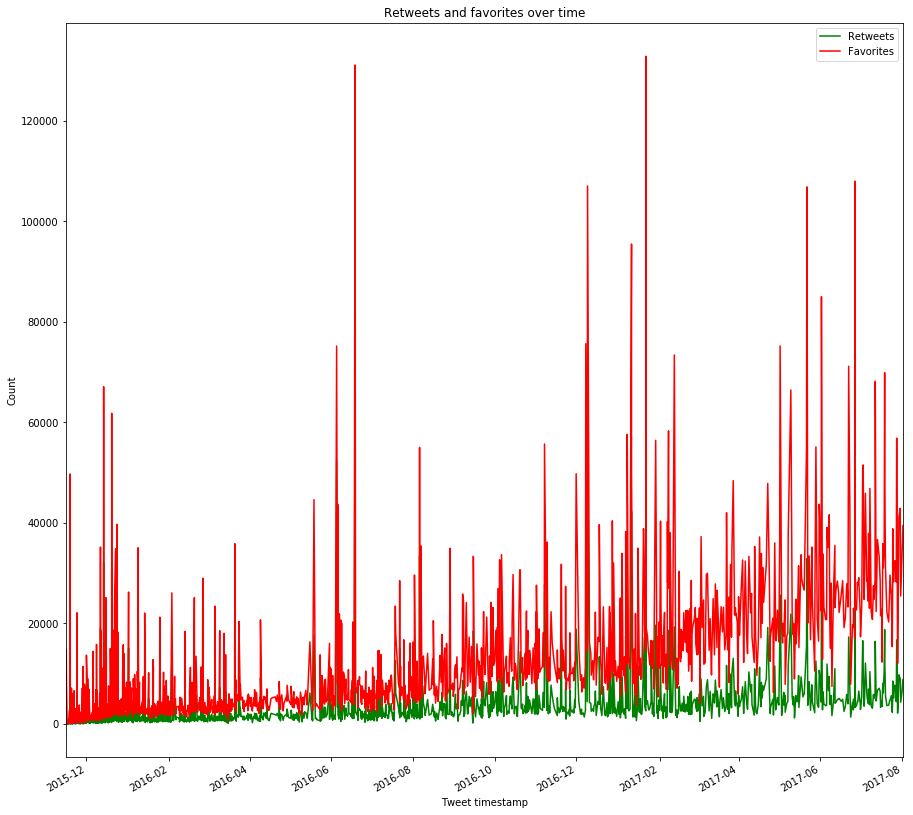

In [68]:
plt.figure(figsize=(15,15))
df['retweet_count'].plot(color = 'green', label='Retweets')
df['favorite_count'].plot(color = 'red', label='Favorites')
plt.legend(loc='upper right')
plt.xlabel('Tweet timestamp')
plt.ylabel('Count')
plt.title('Retweets and favorites over time')
plt.savefig('Retweets_and_favorites_over_time.png')
plt.show()


The above figure shows that people tend to like WRD tweets more than retweeting the difference is increasing with time. 

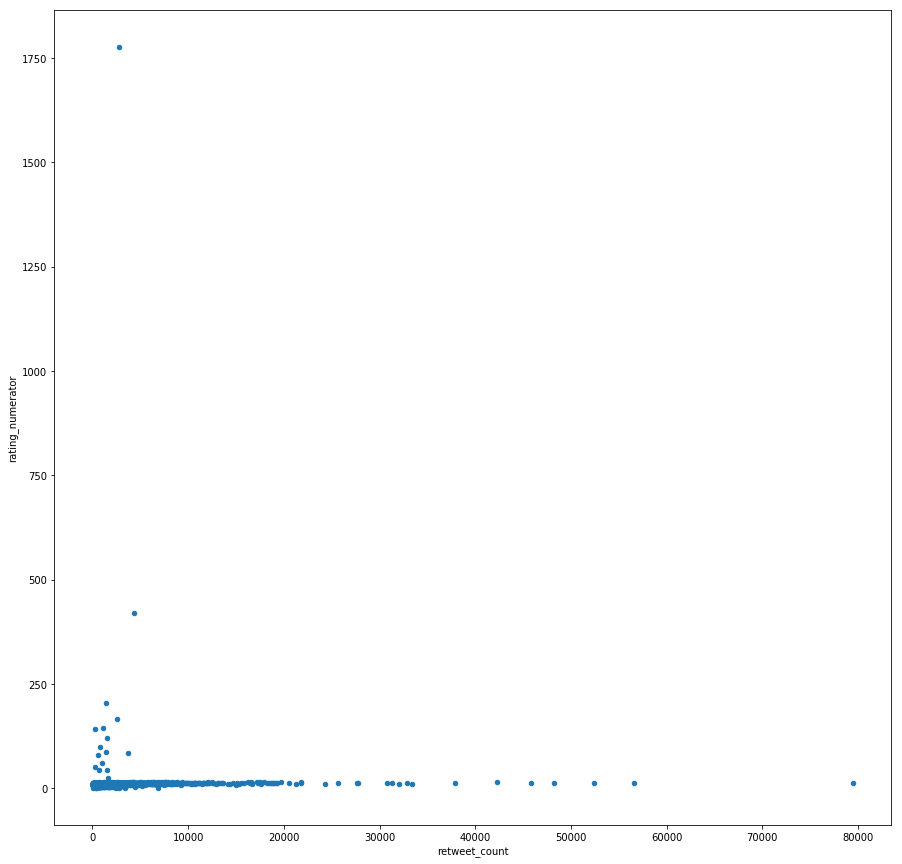

In [69]:
df.plot(x = 'retweet_count' , y = 'rating_numerator', kind= 'scatter', figsize = [15,15])
plt.savefig('ratings_relationship.png')

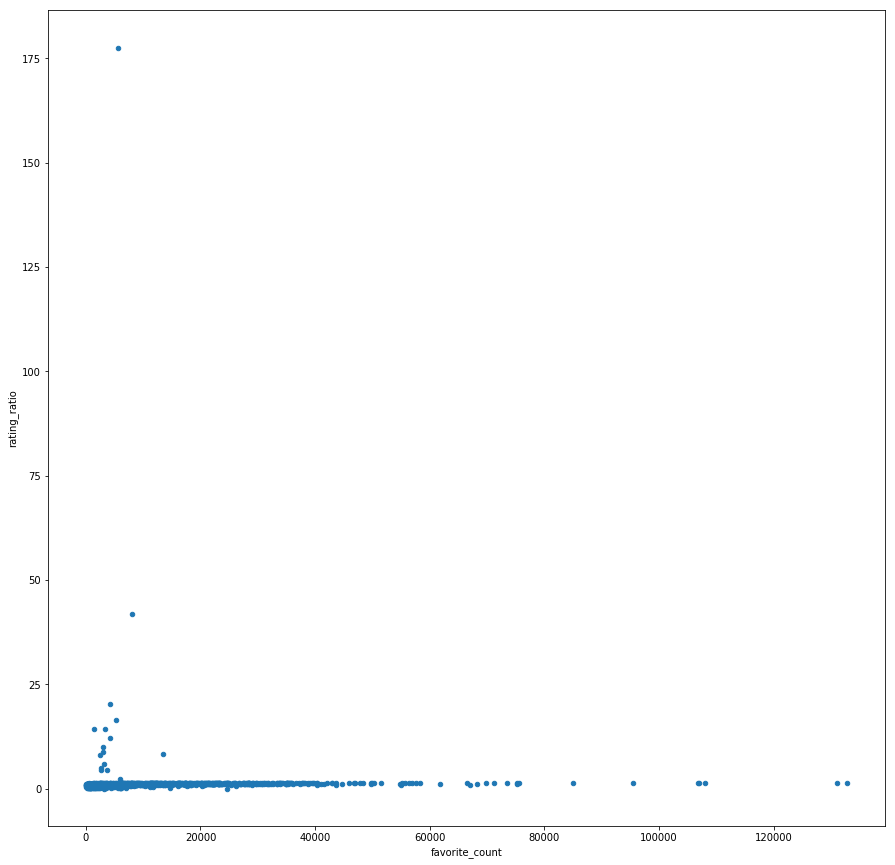

In [70]:
df.plot(x = 'favorite_count' , y = 'rating_ratio', kind= 'scatter', figsize = [15,15])
plt.savefig('rating_vs_favorite_count.png')

The above figures implies that there is no relationship between the rating and favorite or retweet count.

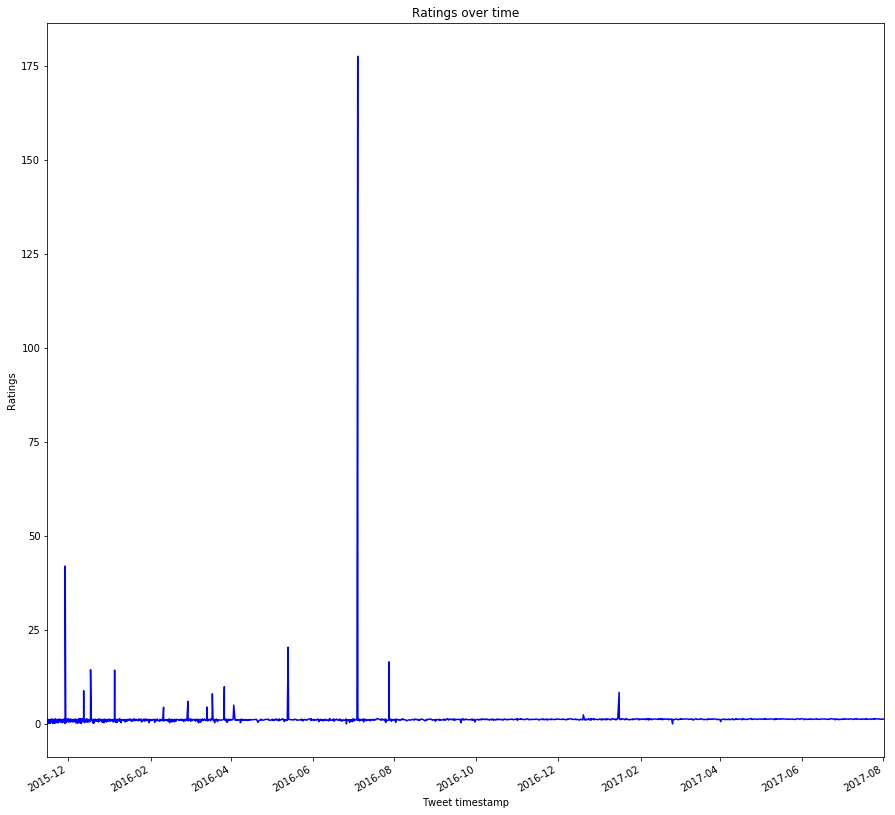

In [71]:
plt.figure(figsize=(15,15))
df['rating_ratio'].plot(color = 'blue', label='Ratings')
plt.xlabel('Tweet timestamp')
plt.ylabel('Ratings')
plt.title('Ratings over time')
plt.savefig('Ratings_over_time.png')
plt.show()

The above figure shows a big jump in ratings between 2016 Jun and August, which need to be further explored for proper explanation.